In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_excel('C:\Dennis\Duke\Data+\Quantifying-wetland-carbon-emissions\data\Original_Dataset.xlsx').dropna()
features.head(5)

,Date,NEE,SW_IN,TA,VPD,P,SWC,WS,TS,WTD,...,LAI_daily,LAI_month_max,FAPAR_daily,FAPAR_month_max,NDVI,SIF_daily_8day,SIF_month,Unnamed: 23,Unnamed: 24,Unnamed: 25
22,20130123,-9999.0,181.252292,11.946437,6.599417,0.0,10.0480,0.661104,17.286,-0.343027,...,1.367,1.367,0.558,0.558,0.5396,1289.750,1327,201301,23,41297
23,20130124,-9999.0,184.299125,12.241813,5.496500,0.0,9.9235,0.580042,15.687,-0.382651,...,1.053,1.367,0.494,0.558,0.4750,1317.875,1327,201301,24,41298
24,20130125,-9999.0,158.978708,14.877333,5.654271,0.0,9.8175,0.374083,15.728,-0.422275,...,0.696,1.367,0.401,0.558,0.4109,1346.000,1327,201301,25,41299
25,20130126,-9999.0,181.892021,14.949750,5.647521,0.0,9.7251,0.450542,16.226,-0.431419,...,0.783,1.367,0.406,0.558,0.4227,1349.500,1327,201301,26,41300
29,20130130,-9999.0,177.521854,23.246562,7.581542,0.0,9.4018,1.214271,21.562,-0.474091,...,0.875,1.367,0.438,0.558,0.4345,1363.500,1327,201301,30,41304


In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (252, 26)


In [4]:
features = pd.DataFrame(features)

In [5]:
features

,Date,NEE,SW_IN,TA,VPD,P,SWC,WS,TS,WTD,...,LAI_daily,LAI_month_max,FAPAR_daily,FAPAR_month_max,NDVI,SIF_daily_8day,SIF_month,Unnamed: 23,Unnamed: 24,Unnamed: 25
22,20130123,-9999.000000,181.252292,11.946437,6.599417,0.0,10.0480,0.661104,17.286,-0.343027,...,1.367,1.367,0.558,0.558,0.5396,1289.750000,1327,201301,23,41297
23,20130124,-9999.000000,184.299125,12.241813,5.496500,0.0,9.9235,0.580042,15.687,-0.382651,...,1.053,1.367,0.494,0.558,0.4750,1317.875000,1327,201301,24,41298
24,20130125,-9999.000000,158.978708,14.877333,5.654271,0.0,9.8175,0.374083,15.728,-0.422275,...,0.696,1.367,0.401,0.558,0.4109,1346.000000,1327,201301,25,41299
25,20130126,-9999.000000,181.892021,14.949750,5.647521,0.0,9.7251,0.450542,16.226,-0.431419,...,0.783,1.367,0.406,0.558,0.4227,1349.500000,1327,201301,26,41300
29,20130130,-9999.000000,177.521854,23.246562,7.581542,0.0,9.4018,1.214271,21.562,-0.474091,...,0.875,1.367,0.438,0.558,0.4345,1363.500000,1327,201301,30,41304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,20161203,0.354874,159.317083,18.789458,6.292229,0.0,8.7694,0.959688,21.763,-0.333883,...,0.849,1.244,0.451,0.537,0.6016,1371.875000,1420,201612,3,42707
1433,20161204,0.476685,146.087750,20.788083,7.805438,0.0,8.7024,0.838042,22.334,-0.324739,...,0.991,1.244,0.483,0.537,0.6890,1375.750000,1420,201612,4,42708
1436,20161207,0.676854,157.470917,19.970854,4.129979,0.0,10.3340,0.413708,23.245,-0.330835,...,1.244,1.244,0.537,0.537,0.6664,1387.375000,1420,201612,7,42711
1451,20161222,0.312585,145.963292,18.532750,4.497688,0.0,9.8543,0.852146,21.149,-0.336931,...,1.095,1.244,0.493,0.537,0.6648,1444.500000,1420,201612,22,42726


In [6]:
def feature_engineering1(df):
    df['season'] = df['Month'] 
    df['season'] = df['season'].replace([2,12], 1)
    df['season'] = df['season'].replace([3,4,5], 2)
    df['season'] = df['season'].replace([6,7,8], 3)
    df['season'] = df['season'].replace([9,10,11], 4)
    return df

In [7]:
features = feature_engineering1(features)

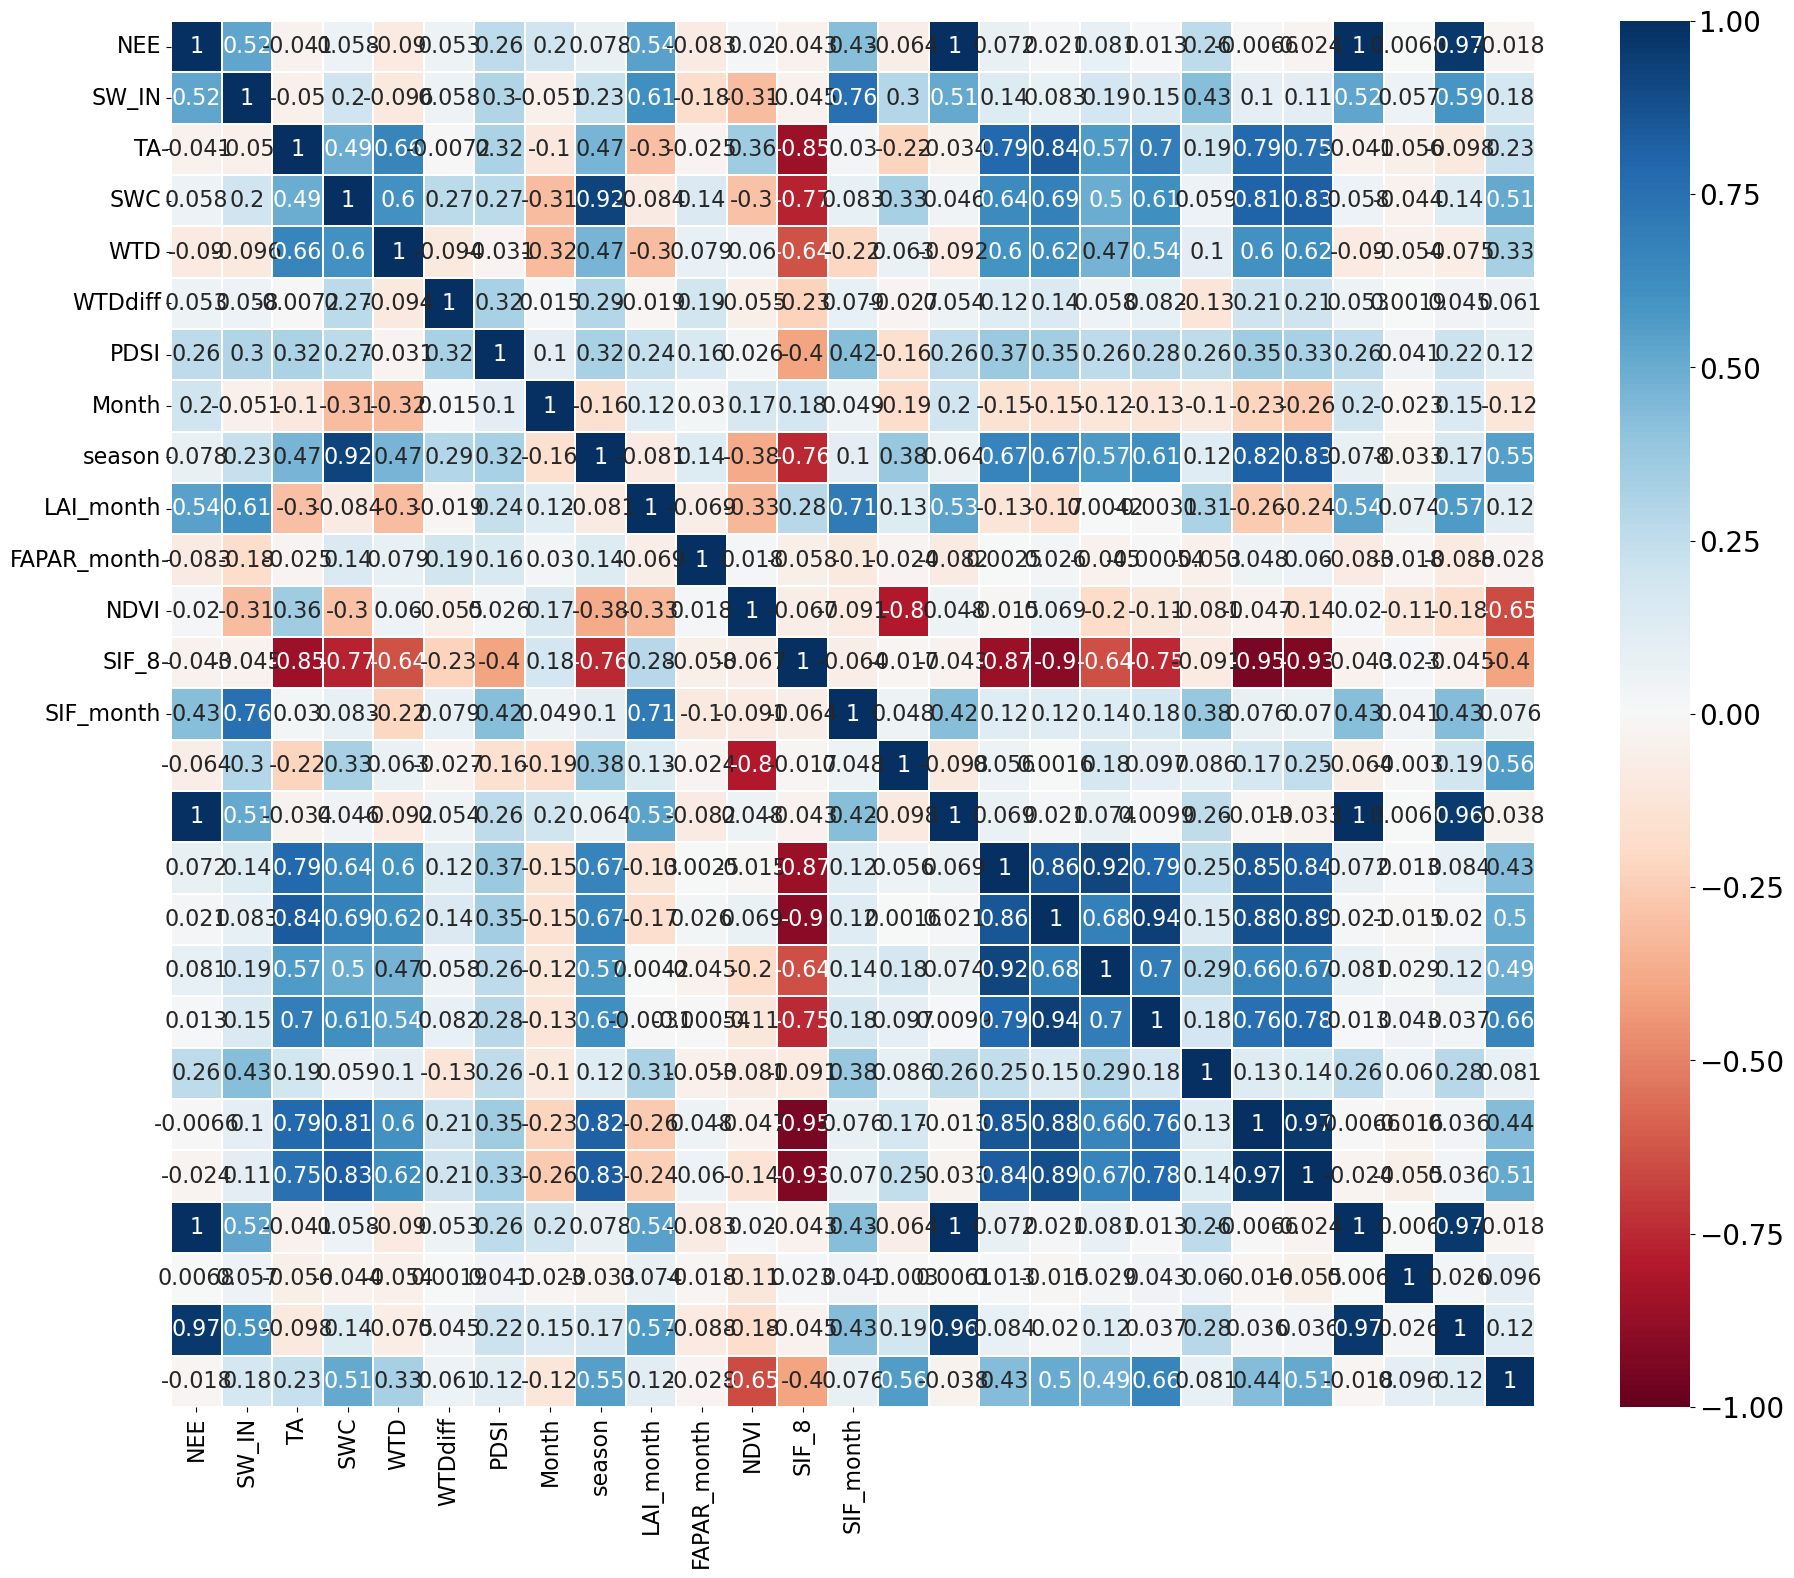

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(features)
f, ax= plt.subplots(figsize = (22, 18))
x_axis_labels = ['NEE','SW_IN','TA','SWC','WTD','WTDdiff','PDSI','Month','season','LAI_month','FAPAR_month','NDVI','SIF_8','SIF_month'] # labels for x-axis
y_axis_labels = ['NEE','SW_IN','TA','SWC','WTD','WTDdiff','PDSI','Month','season','LAI_month','FAPAR_month','NDVI','SIF_8','SIF_month'] # labels for y-axis
corr = data.corr()
# print(corr)
g = sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot_kws={"size": 16})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16)

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
cbar.mappable.set_clim(-1,1)

plt.show()
plt.close()

In [9]:
from sklearn.preprocessing import OneHotEncoder
def onehot_encoder(df,cols):
    onehot_enc = OneHotEncoder(handle_unknown='ignore')
    onehot_enc.fit(df[cols])
    colnames = columns=list(onehot_enc.get_feature_names_out(input_features=cols))
    onehot_vals = onehot_enc.transform(df[cols]).toarray()
    enc_df = pd.DataFrame(onehot_vals,columns=colnames,index=df.index)
    df = pd.concat([df,enc_df],axis=1).drop(cols,axis=1)
    return df

In [10]:
onehotcols = ['Month','season']

features = onehot_encoder(features,onehotcols)

In [11]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we "want to predict
labels = np.array(features['NEE'])
# Remove the labels from the features
# axis 1 refers to the columns
df_upsampled= features.drop('NEE', axis = 1)
# Saving feature names for later use
feature_list = list(df_upsampled.columns)
# Convert to numpy array
features = np.array(df_upsampled)

In [12]:
features.shape

(252, 40)

In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (189, 40)
Training Labels Shape: (189,)
Testing Features Shape: (63, 40)
Testing Labels Shape: (63,)


In [15]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [16]:
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestRegressor(random_state=21)

In [17]:
param_grid = {'bootstrap': [False],
              'min_samples_split': [2, 5, 10],
              'max_depth': [2, 8, 16, None],
              'max_features': ['sqrt','log2'],
              'n_estimators': [3,5,10,20,30,40,50,60,70,80,90,100,200,300,500,1000],
              'min_samples_leaf': [1, 2, 4]}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
gd_sr = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     scoring='r2',
                     cv=KFold(n_splits=3, shuffle=True, random_state=21),
                     error_score="raise")

In [19]:
import warnings

warnings.filterwarnings('ignore')

gd_sr_res = gd_sr.fit(train_features, train_labels)

In [20]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}


In [21]:
best_result = gd_sr.best_score_
print(best_result)

0.9225736685314403


In [22]:
# Import the model we are using
import sklearn.ensemble
# Instantiate model with 3 decision trees
clf1 = sklearn.ensemble.RandomForestRegressor(n_estimators=3, random_state=21)
clf1 = clf1.fit(train_features, train_labels);
acc1 = clf1.score(test_features,test_labels)
print('Accuracy:',acc1)

# Instantiate model with 5 decision trees
clf2 = sklearn.ensemble.RandomForestRegressor(n_estimators=5, random_state=21)
clf2 = clf2.fit(train_features, train_labels);
acc2 = clf2.score(test_features,test_labels)
print('Accuracy:',acc2)

# Instantiate model with 10 decision trees
clf3 = sklearn.ensemble.RandomForestRegressor(n_estimators=10, random_state=21)
clf3 = clf3.fit(train_features, train_labels);
acc3 = clf3.score(test_features,test_labels)
print('Accuracy:',acc3)

# Instantiate model with 20 decision trees
clf4 = sklearn.ensemble.RandomForestRegressor(n_estimators=20, random_state=21)
clf4 = clf4.fit(train_features, train_labels);
acc4 = clf4.score(test_features,test_labels)
print('Accuracy:',acc4)

# Instantiate model with 30 decision trees
clf5 = sklearn.ensemble.RandomForestRegressor(n_estimators=30, random_state=21)
clf5 = clf5.fit(train_features, train_labels);
acc5 = clf5.score(test_features,test_labels)
print('Accuracy:',acc5)

# Instantiate model with 40 decision trees
clf6 = sklearn.ensemble.RandomForestRegressor(n_estimators=40, random_state=21)
clf6 = clf6.fit(train_features, train_labels);
acc6 = clf6.score(test_features,test_labels)
print('Accuracy:',acc6)

# Instantiate model with 50 decision trees
clf7 = sklearn.ensemble.RandomForestRegressor(n_estimators=50, random_state=21)
clf7 = clf7.fit(train_features, train_labels);
acc7 = clf7.score(test_features,test_labels)
print('Accuracy:',acc7)

# Instantiate model with 60 decision trees
clf8 = sklearn.ensemble.RandomForestRegressor(n_estimators=60, random_state=21)
clf8 = clf8.fit(train_features, train_labels);
acc8 = clf8.score(test_features,test_labels)
print('Accuracy:',acc8)

# Instantiate model with 70 decision trees
clf9 = sklearn.ensemble.RandomForestRegressor(n_estimators=70, random_state=21)
clf9 = clf9.fit(train_features, train_labels);
acc9 = clf9.score(test_features,test_labels)
print('Accuracy:',acc9)

# Instantiate model with 80 decision trees
clf10 = sklearn.ensemble.RandomForestRegressor(n_estimators=80, random_state=21)
clf10 = clf10.fit(train_features, train_labels);
acc10 = clf10.score(test_features,test_labels)
print('Accuracy:',acc10)

# Instantiate model with 90 decision trees
clf11 = sklearn.ensemble.RandomForestRegressor(n_estimators=90, random_state=21)
clf11 = clf11.fit(train_features, train_labels);
acc11 = clf11.score(test_features,test_labels)
print('Accuracy:',acc11)

# Instantiate model with 100 decision trees
clf12 = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=21)
clf12 = clf12.fit(train_features, train_labels);
acc12 = clf12.score(test_features,test_labels)
print('Accuracy:',acc12)

# Instantiate model with 200 decision trees
clf13 = sklearn.ensemble.RandomForestRegressor(n_estimators=200, random_state=21)
clf13 = clf13.fit(train_features, train_labels);
acc13 = clf13.score(test_features,test_labels)
print('Accuracy:',acc13)

# Instantiate model with 300 decision trees
clf14 = sklearn.ensemble.RandomForestRegressor(n_estimators=300, random_state=21)
clf14 = clf14.fit(train_features, train_labels);
acc14 = clf14.score(test_features,test_labels)
print('Accuracy:',acc14)

# Instantiate model with 400 decision trees
clf15 = sklearn.ensemble.RandomForestRegressor(n_estimators=400, random_state=21)
clf15 = clf15.fit(train_features, train_labels);
acc15 = clf15.score(test_features,test_labels)
print('Accuracy:',acc15)

# Instantiate model with 500 decision trees
clf16 = sklearn.ensemble.RandomForestRegressor(n_estimators=500, random_state=21)
clf16 = clf16.fit(train_features, train_labels);
acc16 = clf16.score(test_features,test_labels)
print('Accuracy:',acc16)

# Instantiate model with 1000 decision trees
clf17 = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, random_state=21)
clf17 = clf17.fit(train_features, train_labels);
acc17 = clf17.score(test_features,test_labels)
print('Accuracy:',acc17)

# Instantiate model with 1500 decision trees
clf18 = sklearn.ensemble.RandomForestRegressor(n_estimators=1500, random_state=21)
clf18 = clf18.fit(train_features, train_labels);
acc18 = clf18.score(test_features,test_labels)
print('Accuracy:',acc18)

# Instantiate model with 2000 decision trees
clf19 = sklearn.ensemble.RandomForestRegressor(n_estimators=2000, random_state=21)
clf19 = clf19.fit(train_features, train_labels);
acc19 = clf19.score(test_features,test_labels)
print('Accuracy:',acc19)

# Instantiate model with 3000 decision trees
clf20 = sklearn.ensemble.RandomForestRegressor(n_estimators=3000, random_state=21)
clf20 = clf20.fit(train_features, train_labels);
acc20 = clf20.score(test_features,test_labels)
print('Accuracy:',acc20)

# Instantiate model with 5000 decision trees
clf21 = sklearn.ensemble.RandomForestRegressor(n_estimators=5000, random_state=21)
clf21 = clf21.fit(train_features, train_labels);
acc21 = clf21.score(test_features,test_labels)
print('Accuracy:',acc21)

# Instantiate model with 10000 decision trees
clf22 = sklearn.ensemble.RandomForestRegressor(n_estimators=10000, random_state=21)
clf22 = clf22.fit(train_features, train_labels);
acc22 = clf22.score(test_features,test_labels)
print('Accuracy:',acc22)

Accuracy: 0.9867957523483313
Accuracy: 0.957198417430319
Accuracy: 0.9572086705344087
Accuracy: 0.9497849989845824
Accuracy: 0.9618338426144781
Accuracy: 0.9606289133479713
Accuracy: 0.9652941353015175
Accuracy: 0.970253195751602
Accuracy: 0.9719346508844912
Accuracy: 0.9717340662492344
Accuracy: 0.9765072794402526
Accuracy: 0.9759194188025827
Accuracy: 0.9774944123038836
Accuracy: 0.9759211033382152
Accuracy: 0.9772438145599356
Accuracy: 0.9767730628993475
Accuracy: 0.9777096076775362
Accuracy: 0.97767354287817
Accuracy: 0.9769834165443737
Accuracy: 0.9780519102669987
Accuracy: 0.9769820264575155
Accuracy: 0.9769204316585421


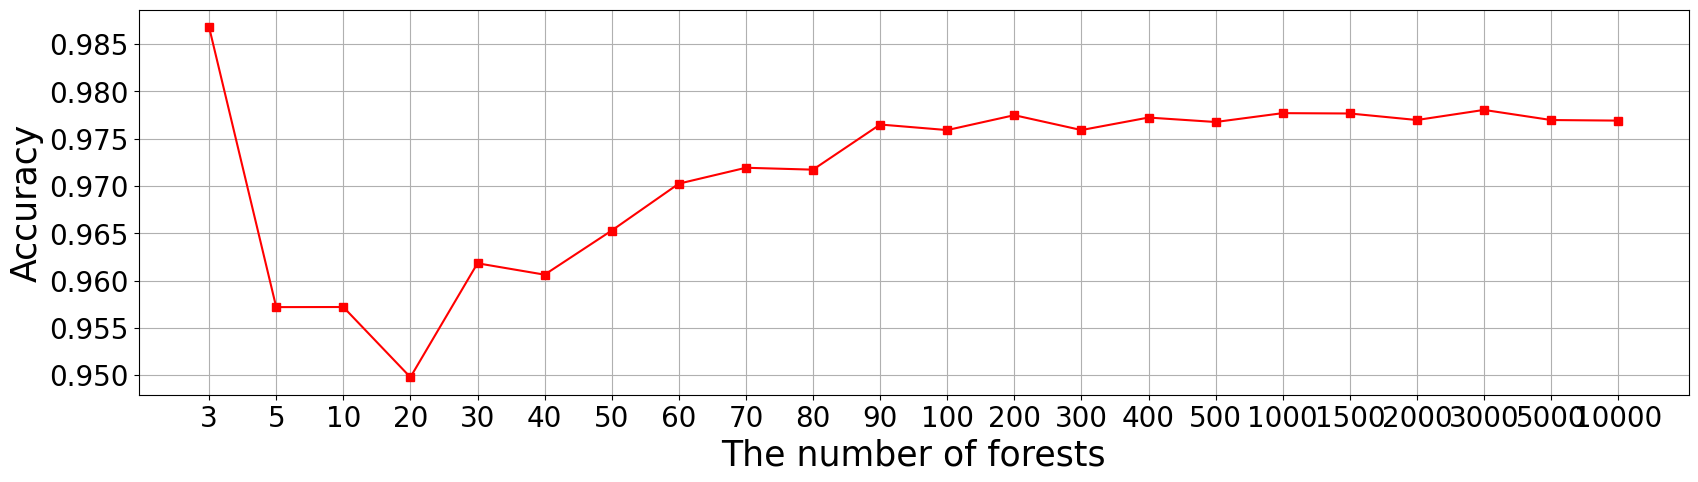

In [23]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
y = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13, acc14, acc15, acc16, acc17, acc18, acc19, acc20, acc21, acc22]
plt.figure(figsize = (20, 5)) 
plt.plot(x,y,'s-',color = 'r')
plt.xlabel("The number of forests", fontdict={'size':25})#横坐标名字
plt.ylabel("Accuracy", fontdict={'size':25})#纵坐标名字
plt.xticks(x, ('3','5','10','20','30','40','50','60','70','80','90','100','200','300','400','500','1000', '1500', '2000', '3000', '5000', '10000'), size=20)
plt.yticks(size = 20)
plt.grid()
plt.show()

In [24]:
# Import the model we are using
import sklearn.ensemble
# Instantiate model with 10000 decision trees
clf = sklearn.ensemble.RandomForestRegressor(n_estimators=1500, random_state=21)
# Train the model on training data
clf = clf.fit(train_features, train_labels);

In [25]:
# Use the forest's predict method on the test data
predictions = clf.predict(test_features)
#Assess the accuracy using the validation dataset
print('Accuracy:',clf.score(test_features,test_labels))

Accuracy: 0.97767354287817


In [26]:
np.savetxt("test_est.txt",predictions)

In [27]:
np.savetxt("test_lab.txt",test_labels)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(test_labels.reshape((-1, 1)), predictions)
a = reg.coef_
b = reg.intercept_

In [29]:
a

array([0.9559114])

In [30]:
b

-0.8922791842410334

In [31]:
reg.score(test_labels.reshape((-1, 1)), predictions) #R^2

0.9785548108282196

Text(0, 0.5, 'NEE Estimated')

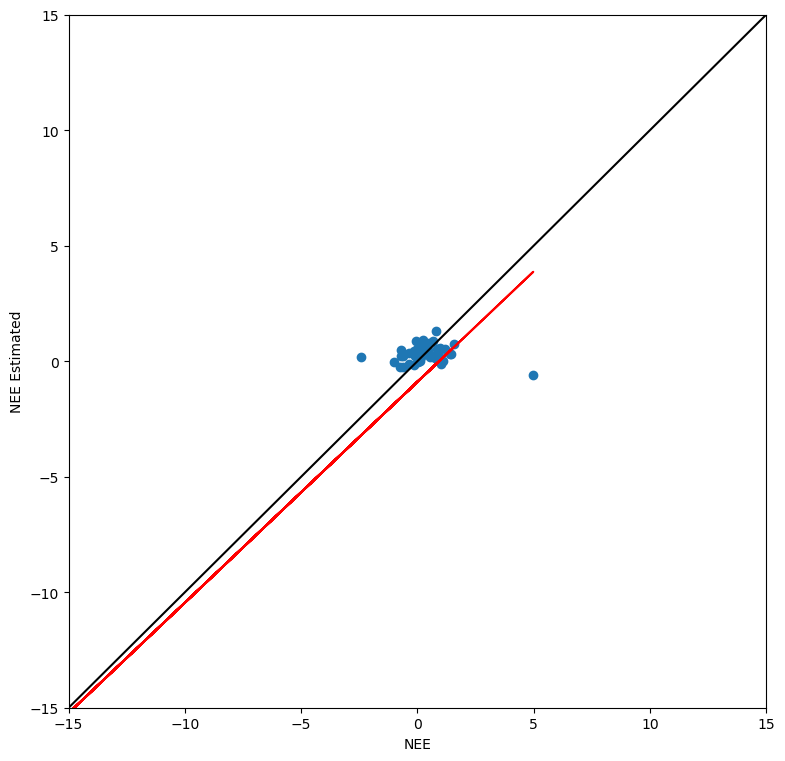

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(9,9))
plt.scatter(test_labels, predictions)
plt.plot([-15,15],[-15,15],color = 'k')
plt.plot(test_labels, a * test_labels + b,color = 'r')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
ax.set_xlabel("NEE")
ax.set_ylabel("NEE Estimated")

In [33]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Date                 Importance: 0.4333
Variable: Unnamed: 25          Importance: 0.4327
Variable: Unnamed: 23          Importance: 0.1273
Variable: PDSI                 Importance: 0.0067
Variable: SW_IN                Importance: 0.0
Variable: TA                   Importance: 0.0
Variable: VPD                  Importance: 0.0
Variable: P                    Importance: 0.0
Variable: SWC                  Importance: 0.0
Variable: WS                   Importance: 0.0
Variable: TS                   Importance: 0.0
Variable: WTD                  Importance: 0.0
Variable: WTDdiff              Importance: 0.0
Variable: SIN(DOY)             Importance: 0.0
Variable: COS(DOY)             Importance: 0.0
Variable: Year                 Importance: 0.0
Variable: LAI_daily            Importance: 0.0
Variable: LAI_month_max        Importance: 0.0
Variable: FAPAR_daily          Importance: 0.0
Variable: FAPAR_month_max      Importance: 0.0
Variable: NDVI                 Importance: 0.0
V

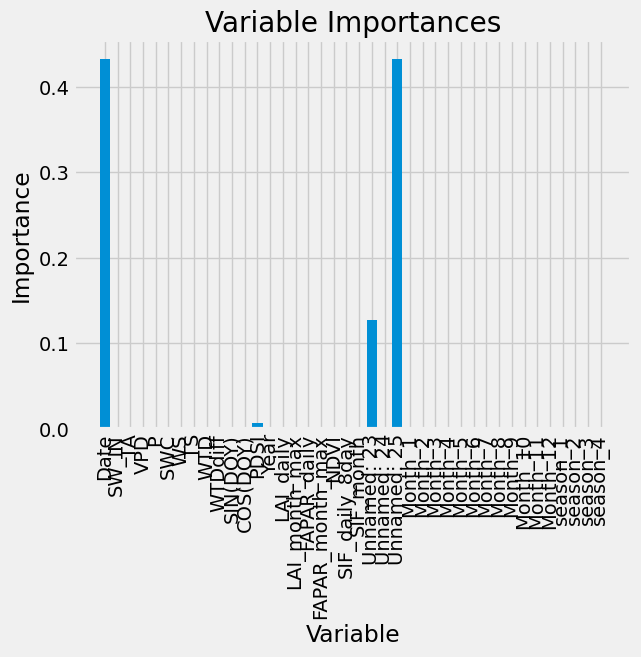

In [34]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [35]:
from sklearn.inspection import partial_dependence
sk_data0 = partial_dependence(clf, X = features, features = [0], percentiles=[0,1])

In [36]:
sk_data0

{'average': array([[-628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576, -628.90734576, -628.90734576, -628.90734576,
         -628.90734576,

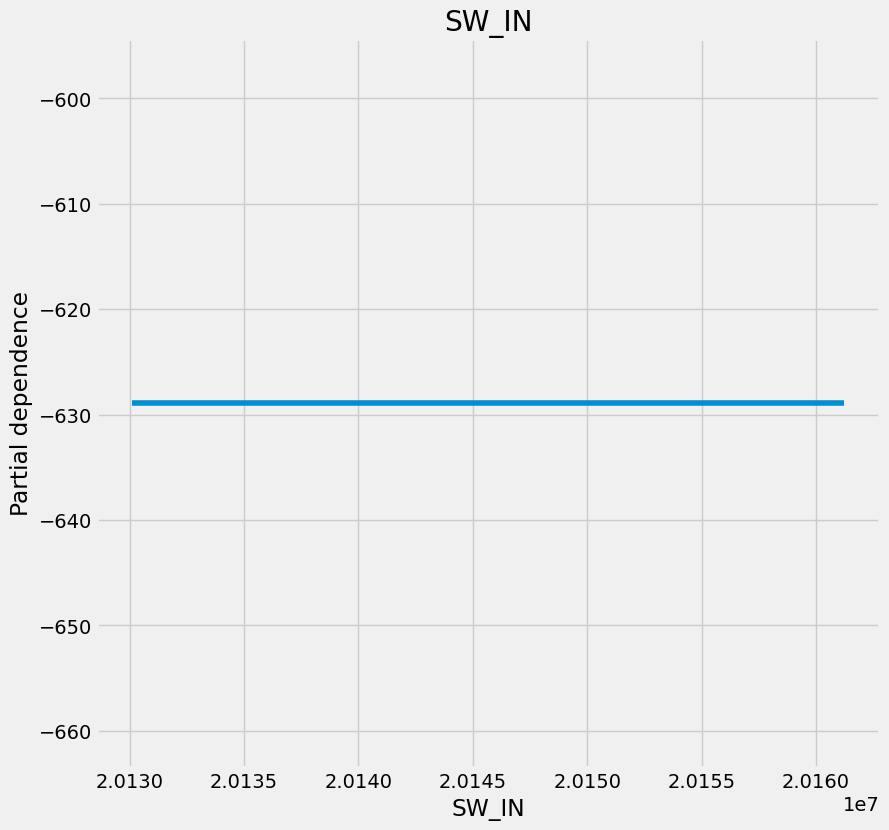

In [37]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data0["values"][0], sk_data0["average"][0])
ax2.set_title("SW_IN")
ax2.set_xlabel("SW_IN")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [38]:
from sklearn.inspection import partial_dependence
sk_data1 = partial_dependence(clf, X = features, features = [2], percentiles=[0,1])

In [39]:
sk_data1

{'average': array([[-1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092, -1110.48253092, -1110.48253092,
         -1110.48253092, -1110.48253092,

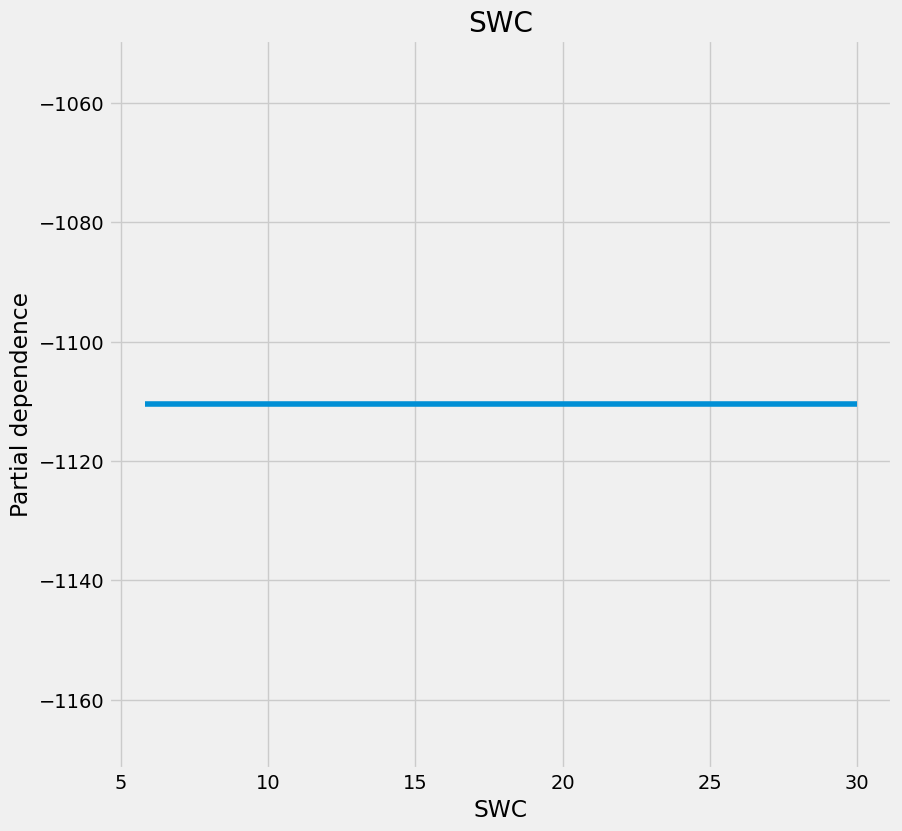

In [40]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data1["values"][0], sk_data1["average"][0])
ax2.set_title("SWC")
ax2.set_xlabel("SWC")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [41]:
from sklearn.inspection import partial_dependence
sk_data2 = partial_dependence(clf, X = features, features = [3], percentiles=[0,1])

In [42]:
sk_data2

{'average': array([[-1110.55722089, -1110.56253834, -1110.56423276, -1110.56365257,
         -1110.55605748, -1110.53319422, -1110.52936074, -1110.52559692,
         -1110.52535773, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038, -1110.52634038, -1110.52634038,
         -1110.52634038, -1110.52634038,

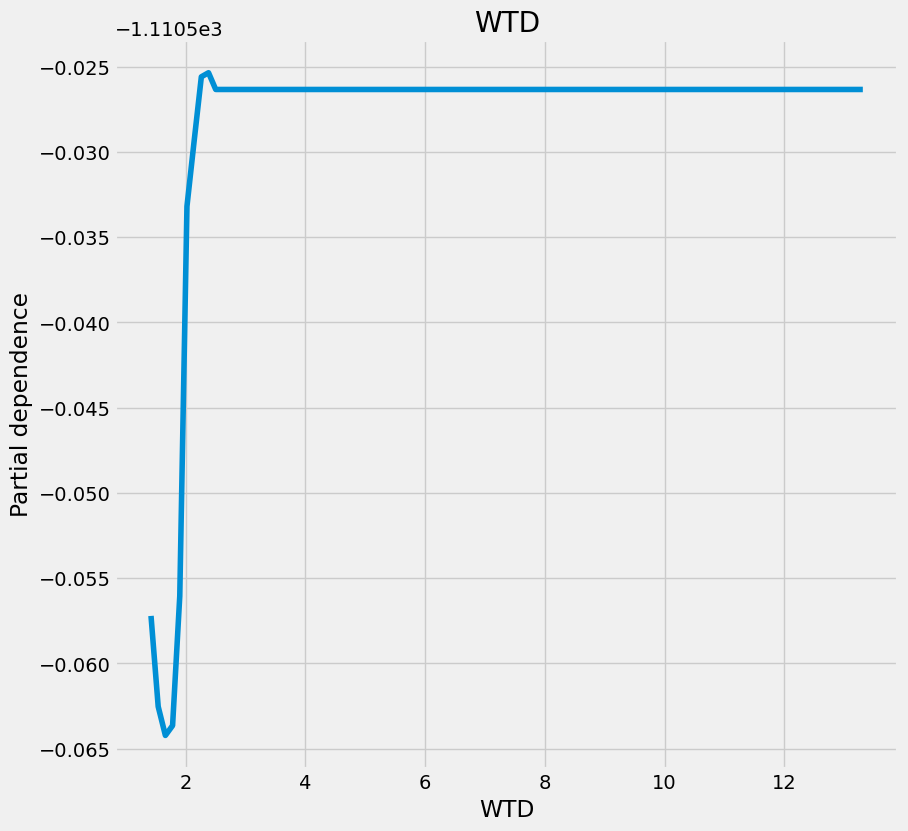

In [43]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data2["values"][0], sk_data2["average"][0])
ax2.set_title("WTD")
ax2.set_xlabel("WTD")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [44]:
from sklearn.inspection import partial_dependence
sk_data5 = partial_dependence(clf, X = features, features = [1], percentiles=[0,1])

In [45]:
sk_data5

{'average': array([[-1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773, -1110.47513773, -1110.47513773,
         -1110.47513773, -1110.47513773,

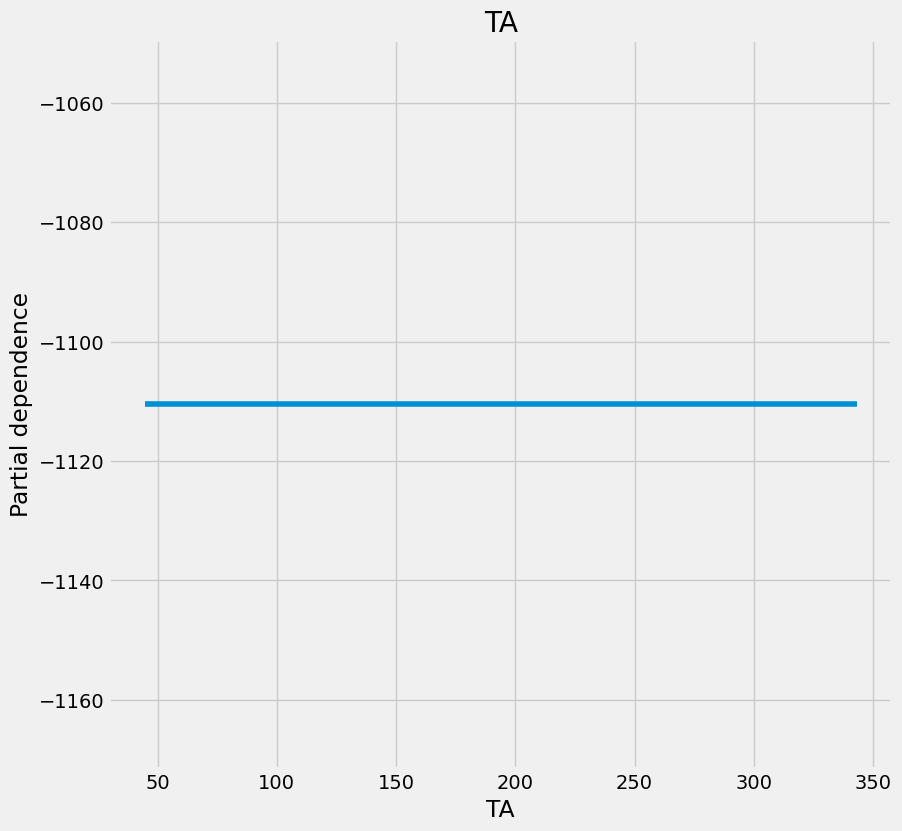

In [46]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data5["values"][0], sk_data5["average"][0])
ax2.set_title("TA")
ax2.set_xlabel("TA")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [47]:
sk_data6 = partial_dependence(clf, X = features, features = [5], percentiles=[0,1])

In [48]:
sk_data6

{'average': array([[-1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751, -1110.84050751, -1110.84050751,
         -1110.84050751, -1110.84050751,

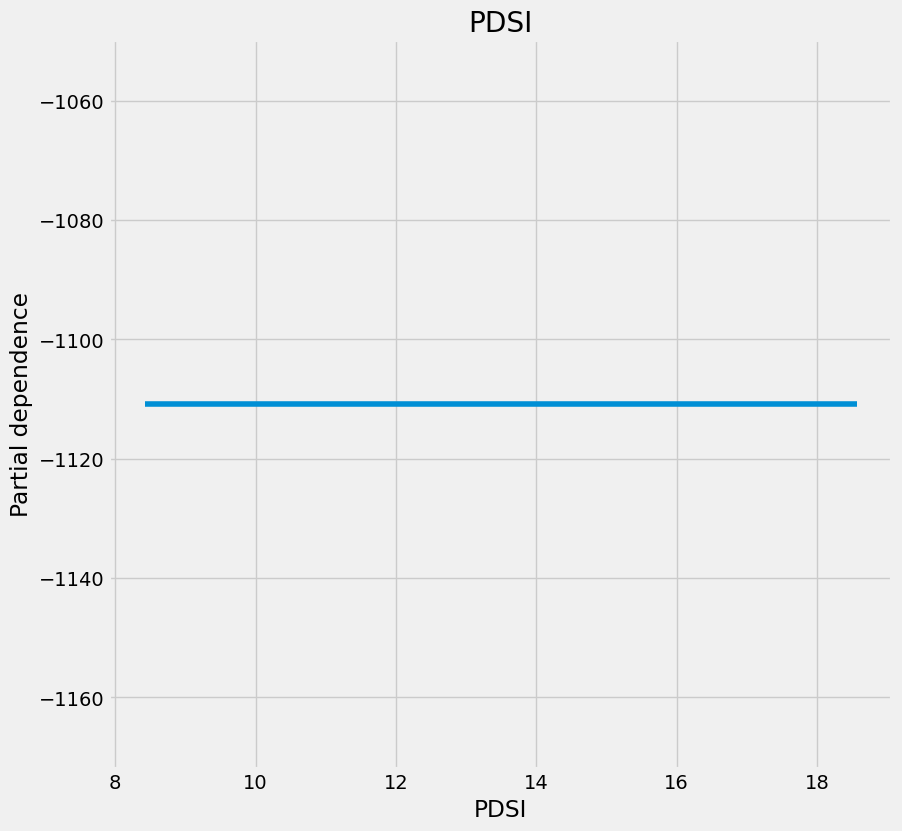

In [49]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data6["values"][0], sk_data6["average"][0])
ax2.set_title("PDSI")
ax2.set_xlabel("PDSI")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [50]:
sk_data7 = partial_dependence(clf, X = features, features = [6], percentiles=[0,1])

In [51]:
sk_data7

{'average': array([[-1110.58618242, -1110.58491382, -1110.59825075, -1110.59944578,
         -1110.61368471, -1110.61483823, -1110.61645061, -1110.61851376,
         -1110.63107503, -1110.63193627, -1110.63621921, -1110.63701468,
         -1110.63992654, -1110.63963073, -1110.63883477, -1110.63940986,
         -1110.63992435, -1110.64455147, -1110.64766565, -1110.64788106,
         -1110.64791098, -1110.64906026, -1110.65101268, -1110.65190782,
         -1110.6517082 , -1110.65619086, -1110.65697812, -1110.66237053,
         -1110.66240842, -1110.66419295, -1110.66728554, -1110.67278004,
         -1110.67304667, -1110.67384508, -1110.67704199, -1110.67751479,
         -1110.68123775, -1110.68163828, -1110.68194394, -1110.68219059,
         -1110.68221498, -1110.68736963, -1110.68734397, -1110.68842593,
         -1110.6886177 , -1110.68910666, -1110.68908122, -1110.68852925,
         -1110.68848939, -1110.68845594, -1110.68856314, -1110.69175458,
         -1110.69233125, -1110.69227772,

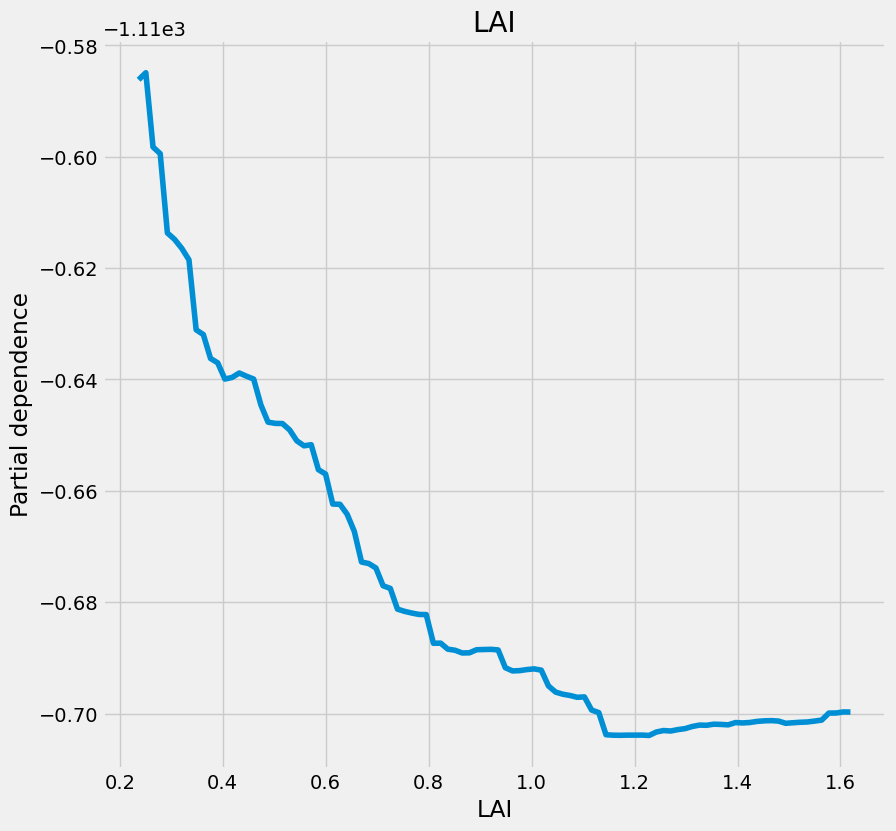

In [52]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data7["values"][0], sk_data7["average"][0])
ax2.set_title("LAI")
ax2.set_xlabel("LAI")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [53]:
sk_data8 = partial_dependence(clf, X = features, features = [7], percentiles=[0,1])

In [54]:
sk_data8

{'average': array([[-1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759, -1109.66286759, -1109.66286759,
         -1109.66286759, -1109.66286759,

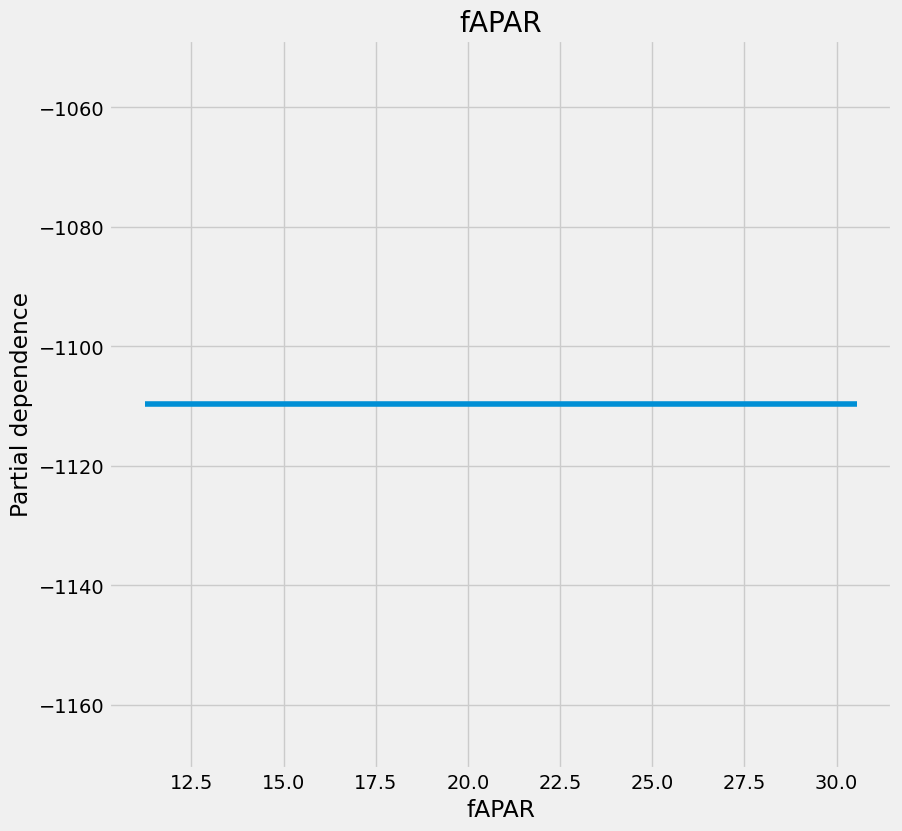

In [55]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data8["values"][0], sk_data8["average"][0])
ax2.set_title("fAPAR")
ax2.set_xlabel("fAPAR")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [56]:
sk_data9 = partial_dependence(clf, X = features, features = [8], percentiles=[0,1])

In [57]:
sk_data9

{'average': array([[-1110.3723469 , -1110.37601089, -1110.3762204 , -1110.37619829,
         -1110.37635242, -1110.37708808, -1110.37578432, -1110.37465999,
         -1110.37581953, -1110.37547095, -1110.37559916, -1110.3761727 ,
         -1110.37789047, -1110.37790347, -1110.383907  , -1110.38375137,
         -1110.38365347, -1110.38465181, -1110.38454234, -1110.38453783,
         -1110.38503565, -1110.38380971, -1110.38432645, -1110.38464017,
         -1110.38574607, -1110.38593594, -1110.38603508, -1110.39030194,
         -1110.3902289 , -1110.3960732 , -1110.39610319, -1110.41456879,
         -1110.41589192, -1110.417101  , -1110.41813052, -1110.43161701,
         -1110.4372718 , -1110.46519805, -1110.46851692, -1110.50388219,
         -1110.51845033, -1110.55779122, -1110.57071522, -1110.59589508,
         -1110.59835002, -1110.60075029, -1110.6049805 , -1110.60598374,
         -1110.60906581, -1110.6096298 , -1110.60910619, -1110.60907988,
         -1110.60997126, -1110.61030049,

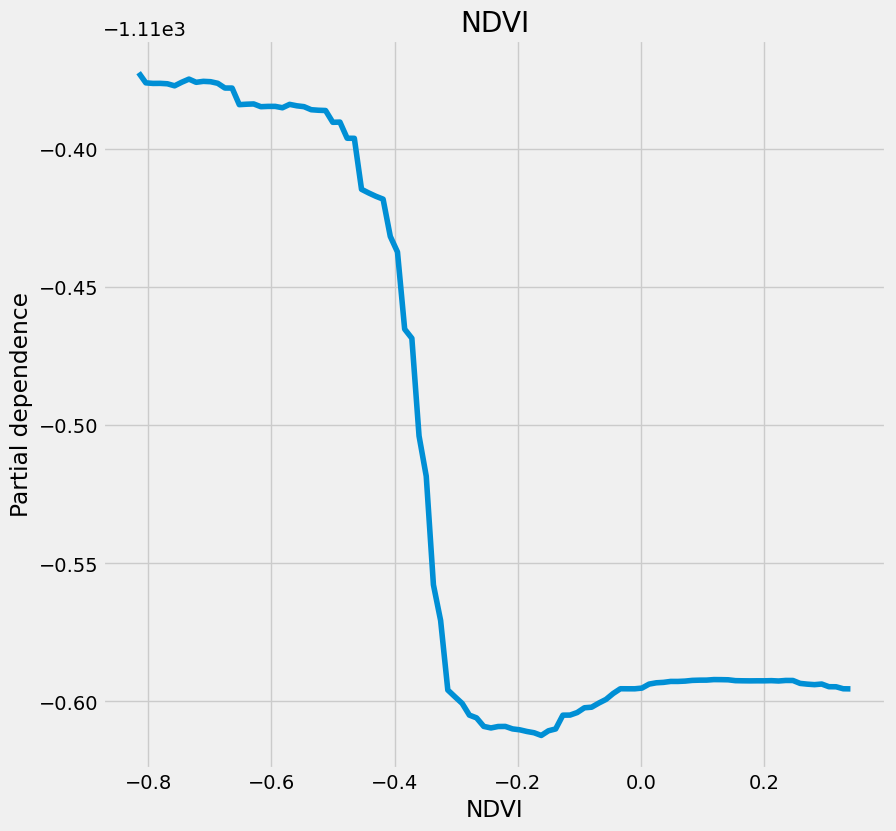

In [58]:
f, axs = plt.subplots(1,1,figsize=(9,9))
ax2 = plt.subplot(111)
plt.plot(sk_data9["values"][0], sk_data9["average"][0])
ax2.set_title("NDVI")
ax2.set_xlabel("NDVI")
ax2.set_ylabel("Partial dependence")
plt.subplots_adjust(hspace = 0.3)

In [59]:
new_prediction = np.empty(shape = (101184,29))

In [60]:
import netCDF4 as nc
f = nc.Dataset('input_noah_graaf_annual.nc')
var_data = f['input_annual'][:]
for i in range(29):
    new_features = var_data[i,:,:].T
    features = pd.DataFrame(new_features[:,2:],columns = ['SW_IN','TA','SWC','WTD','WTD_diff','PDSI','Month','season','LAI','fAPAR','NDVI'])
    df = onehot_encoder(features,onehotcols)
    new_prediction[:,i] = clf.predict(df)
np.savetxt("predictions.txt",new_prediction)

ModuleNotFoundError: No module named 'netCDF4'